# Assignment 2: Maximum Likelihood [ __ / 70 marks]


<img src="https://www.statisticshowto.com/wp-content/uploads/2015/09/Laplace-distribution.png" height=200 width=450>

The Laplace distribution is a continuous probability distribution defined as the following:

$$ f(y; \mu, \lambda) = \frac{1}{2\lambda}\exp\Bigg(-\frac{\lvert y-\mu \rvert}{\lambda}\Bigg)$$

In this assignment we will use Maximum Likelihood Estimation to fit a Laplace distribution to a dataset, assuming an exponential model ($\hat{y}=\exp(\mathbf{Xb}$)) rather than our previous linear model ($\hat{y}=\mathbf{Xb}$). Here again we will find optimal values for $\mathbf{b}$. However, unlike our previous work, instead of finding a parameter $\mathbf{b}$ which minimizes a loss function, we will find a $\mathbf{b}$ *which maximizes the Laplace Log Likelihood*. Feel free to refer to `L2_codeF2.ipynb`.

### Before you submit...
* For good measure, restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so
from sklearn import linear_model
from IPython.display import display

### Question 1 [ _ / 7 Marks]
For a Laplace distribution we can write the negative log likelihood as the following:

$$\ell(y_1,y_2,...,y_n; \mu, \lambda)=-\sum_{i=1}^{n}-\log(2\lambda)-\frac{\lvert y_i-\mu \rvert}{\lambda}$$

Write a function called `laplaceNegLogLikelihood` which takes a vector $\mathbf{y}$ and parameters $\mu$ and $\lambda$ and returns the negative log likelihood. Test your function by calling it with `mu = 0`, `lam = 1` and `y=np.array([2,1,0,0])`.

In [26]:
def laplaceNegLogLikelihood(mu,lam,y):
    # Compute and return nll (negative log likelihood) [ /5 marks]
    n = y.shape[0]
    nll = n * np.log(2 * lam) + np.sum(np.abs(y - mu)/lam)
    return nll

#Test your function with these values [ /2 marks]
mu=0
lam=1
y=np.array([2,1,0,0])

# ****** your code here ******
laplaceNegLogLikelihood(mu,lam,y)

5.772588722239782

### Question 2 [ _ / 6 Marks]

Write a function called `laplaceRegNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$, a matrix $\mathbf{X}$ of features, and a vector $\mathbf{b}$ of parameters. The function should return the negative log likelihood, assuming that each element of  $\mathbf{y}$ is independent and identically distributed (i.e. Coming from a Laplace distribution) with parameter $\mu = \exp(\mathbf{X}\mathbf{b})$. In your return statement, let `lam=1`. Test your function by calling it with `b=np.array([1,2])`, `X=np.array([[1,1,1],[0,2,1]]).T`, `y=np.array([0,2,10])`


In [27]:
def laplaceRegNegLogLikelihood(b, X, y):
    # Compute mu [ /2 marks]
    mu = np.exp(np.dot(X, b))
    # Compute negative log likelihood (let lam = 1) [ /2 marks]
    nll = laplaceNegLogLikelihood(mu, 1, y)
    return nll

#Test your function with these values [ /2 marks]
b=np.array([1,2])
X=np.array([[1,1,1],[0,2,1]]).T
y=np.array([0,2,10])

# ****** your code here ******
laplaceRegNegLogLikelihood(b, X, y)

161.29641939590317

### Question 3 [ _ / 4 Marks]

Write a function called `modelPredict` which accepts as its first argument $\mathbf{b}$ (exponential model parameters) and a matrix $\mathbf{X}$ (for the exponential model, a column of ones and column of $x_i$ inputs).  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\mathbf{b})$. Test your function by calling it with `b=np.array([1,2])`, `X=np.array([[1,1,1],[0,2,1]]).T`.

In [28]:
def modelPredict(b,X):
    #Compute yhat [ /2 marks]
    yhat = np.exp(np.dot(X, b))
    return yhat

#Test your function with these values [ /2 marks]
b=np.array([1,2])
X=np.array([[1,1,1],[0,2,1]]).T

# ****** your code here ******

modelPredict(b, X)

array([  2.71828183, 148.4131591 ,  20.08553692])

### Question 4 [ _ / 6 Marks]

Write a function called `modelFit` which accepts matrix $\mathbf{X}$ and outcomes vector $\mathbf{y}$ as arguments. The function should return a prediction for $\mathbf{b}$ which maximizes the Laplace Log Likelihood. Test your function with `X=np.array([[1,1,1],[0,2,1]]).T`, `y=np.array([0,2,10])`. Which values do you get for $\mathbf{b}$? Print these values.

In [29]:
def modelFit(X,y):
    b_init = np.zeros(X.shape[1])
    # Start from b_init. Use so.minimize to get a prediction for b which maximizes Laplace Log Likelihood [ /4 marks]  
    RES = so.minimize(laplaceRegNegLogLikelihood, b_init, args=(X,y), method="Powell", tol=1e-8)
    return RES.x

#Test your function with these values [ /2 marks]
X = np.array([[1,1,1],[0,2,1]]).T
y = np.array([0,2,10])

# ****** your code here ******
modelFit(X,y)

array([6.93146718e-01, 2.31285966e-07])

### Question 5 [ _ / 6 Marks]

Load in the data from `A2.csv`. This is a toy dataset which is meant to illustrate geyser eruption times vs. waiting times (until a particular eruption event). "x" in this dataset is $\frac{1}{\text{eruption length}}$ ($\text{minutes}^{-1}$) for a particular eruption. "y" in this dataset describes the waiting time until said eruption (minutes). Plot a scatterplot of the data. Include axis labels. 

Text(0, 0.5, 'waiting time')

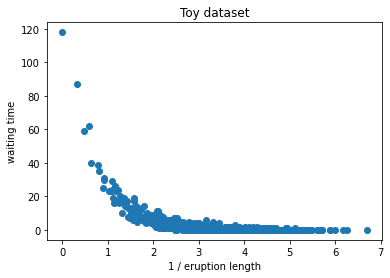

In [30]:
# Load in the data [ /2 marks]
df = pd.read_csv("A2.csv")
# Plot a scatterplot with labels [ /4 marks]
# ****** your code here ******

plt.title("Toy dataset")
plt.scatter(df["x"], df["y"])
plt.xlabel("1 / eruption length")
plt.ylabel("waiting time")


### Question 6 [ _ / 19 Marks]

Fit a Laplace regression to this data using the functions you wrote above. To recap: here you will find parameters $\mathbf{b}$ (from $\mu = \exp(\mathbf{Xb}))$ which maximize the Laplace Log Likelihood for our A2 data. Plot the model predictions (`y_pred`) over a set of new x-values $x_{new} \in [0,6]$ (you can use np.linspace for this) in addition to a scatterplot of the data (i.e. plot points + fit).  

[ 4.78954292 -1.52780528]


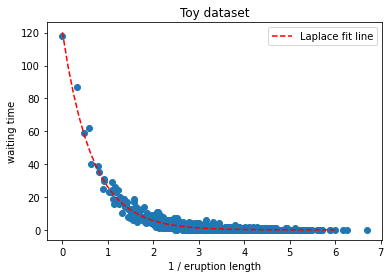

In [31]:
#First, construct the matrix X (with a column of ones and a column of x values) [ /4 marks]
x = df.loc[:,"x"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))

#Next, find b by calling modelFit. modelFit should optimize the laplaceRegressionNegLogLikelihood [ /4 marks]
y = df.loc[:,"y"].values
b = modelFit(X, y)
print(b)
# For our prediction we need to create new x data (use linspace) and put it in matrix X [ /4 marks]
x_grid = np.linspace(0, 6, 50)
X_new = np.c_[np.ones(x_grid.size), x_grid]

# Use modelPredict to get y_pred [ /2 marks]
y_pred = yp = modelPredict(b, X_new)

#Plot the data points and predictions on the same plot; color the predictions red [ /5 marks] 
# ****** your code here ******
plt.plot(X_new[:,1], y_pred, color='red', linestyle='--')
plt.title("Toy dataset")
plt.scatter(df["x"], df["y"])
plt.xlabel("1 / eruption length")
plt.ylabel("waiting time")
plt.legend(["Laplace fit line"])


### Question 7 [ _ / 22 marks] 

Finally, apply linear regression (L2, also called "OLS") to the data, obtain parameter estimates and plot the predictions over the same range as in Question 6 (i.e. $x \in [0,6]$). Do you see a problem with the linear regression? Explain why this might be a problem in a sentence or two.

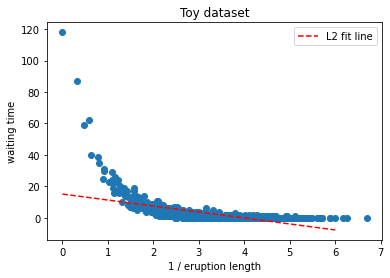

In [32]:
#First, construct the matrix X (with a column of ones and a column of x values) [ /4 marks]
x = df.loc[:,"x"].values
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))

# Get y values, then use sklearn's linear_model.LinearRegression().fit() to create an L2 fit (using X and y) [ /4 marks]
y = df.loc[:,"y"].values
L2_fit = linear_model.LinearRegression().fit(X, y) 

# For our prediction we need to create new x data (use linspace) and put this in matrix X_new [ /4 marks]
x_grid = np.linspace(0, 6, 10)
X_new = np.c_[np.ones(x_grid.size), x_grid]

# Use sklearn's "predict" method to get your prediction, given an input matrix X_new y_pred_L2 [ /2 marks]
y_pred_L2 = L2_fit.predict(X_new)

# Plot the data and linear regression on the same figure. Label axes [ /5 marks]
# ****** your code here ******
plt.plot(X_new[:,1], y_pred_L2, color='red', linestyle='--')
plt.title("Toy dataset")
plt.scatter(df["x"], df["y"])
plt.xlabel("1 / eruption length")
plt.ylabel("waiting time")
plt.legend(["L2 fit line"])


Why is it a problem? [_ /3 marks]

A: Linear regression only looks at linear relationship between dependent and independent variables. Linear regression assumes there is a straight-line relationship between them. Hence it does not perform well on this dataset.